<a href="https://colab.research.google.com/github/Ashishkumarpanda/Train-Plot-CNN-layer/blob/main/Hidddenlayercheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install keras-tuner

     |████████████████████████████████| 61kB 2.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=d9885e79add6fce02e4a6df49e0b0b0c699bb6f4569bc639078717fa828fe9b8
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=1804401642555d4db409b0c917e005b9fb7a657f715726672f41907d336996c6
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [3]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D
from keras.optimizers import Adam
from keras.activations import relu,softmax
from kerastuner import RandomSearch
from keras.utils.vis_utils import plot_model
from sklearn import metrics

In [4]:
data=keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


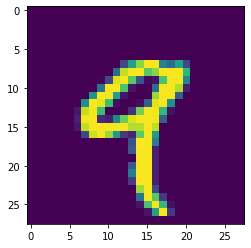

In [7]:
plt.imshow(x_train[4])

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [13]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [14]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [15]:
search=RandomSearch(build_model,'val_accuracy',max_trials=5,directory='output',project_name='mnist')

In [16]:
search.search(x_train,y_train,epochs=3,validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 15s 9ms/step - loss: 0.5768 - accuracy: 0.8122 - val_loss: 0.2133 - val_accuracy: 0.9392
Epoch 2/3
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2426 - accuracy: 0.9272 - val_loss: 0.1780 - val_accuracy: 0.9498
Epoch 3/3
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1958 - accuracy: 0.9419 - val_loss: 0.1534 - val_accuracy: 0.9560


Epoch 1/3
1688/1688 [==============================] - 17s 10ms/step - loss: 2.3028 - accuracy: 0.1089 - val_loss: 2.3038 - val_accuracy: 0.1050
Epoch 2/3
1688/1688 [==============================] - 16s 10ms/step - loss: 2.3025 - accuracy: 0.1097 - val_loss: 2.3031 - val_accuracy: 0.1050
Epoch 3/3
1688/1688 [==============================] - 17s 10ms/step - loss: 2.3027 - accuracy: 0.1099 - val_loss: 2.3022 - val_accuracy: 0.1050


Epoch 1/3
1688/1688 [==============================] - 16s 10ms/step - loss: 2.3030 - accuracy: 0.1099 - val_loss: 2.3027 - val_accuracy: 0.1050
Epoch 2/3
1688/1688 [==============================] - 16s 9ms/step - loss: 2.3025 - accuracy: 0.1107 - val_loss: 2.3054 - val_accuracy: 0.1050
Epoch 3/3
1688/1688 [==============================] - 16s 9ms/step - loss: 2.3025 - accuracy: 0.1102 - val_loss: 2.3048 - val_accuracy: 0.1050


Epoch 1/3
1688/1688 [==============================] - 17s 10ms/step - loss: 2.3016 - accuracy: 0.1126 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 2/3
1688/1688 [==============================] - 17s 10ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3018 - val_accuracy: 0.1050
Epoch 3/3
1688/1688 [==============================] - 17s 10ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3018 - val_accuracy: 0.1050


Epoch 1/3
1688/1688 [==============================] - 18s 11ms/step - loss: 0.7158 - accuracy: 0.7755 - val_loss: 0.3106 - val_accuracy: 0.9067
Epoch 2/3
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3505 - accuracy: 0.8981 - val_loss: 0.2504 - val_accuracy: 0.9288
Epoch 3/3
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3131 - accuracy: 0.9075 - val_loss: 0.2378 - val_accuracy: 0.9320


INFO:tensorflow:Oracle triggered exit


In [17]:
model=search.get_best_models(num_models=1)[0]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 48)                1486896   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490       
Total params: 1,506,714
Trainable params: 1,506,714
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1709 - accuracy: 0.9494 - val_loss: 0.1595 - val_accuracy: 0.9567
Epoch 5/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1558 - accuracy: 0.9534 - val_loss: 0.1275 - val_accuracy: 0.9643
Epoch 6/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1441 - accuracy: 0.9567 - val_loss: 0.1341 - val_accuracy: 0.9605
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1345 - accuracy: 0.9594 - val_loss: 0.1311 - val_accuracy: 0.9637
Epoch 8/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1266 - accuracy: 0.9619 - val_loss: 0.1454 - val_accuracy: 0.9575
Epoch 9/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.1210 - accuracy: 0.9635 - val_loss: 0.1049 - val_accuracy: 0.9708
Epoch 10/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1123 - accuracy: 0.9665 - val_loss: 0.1076 - val_a

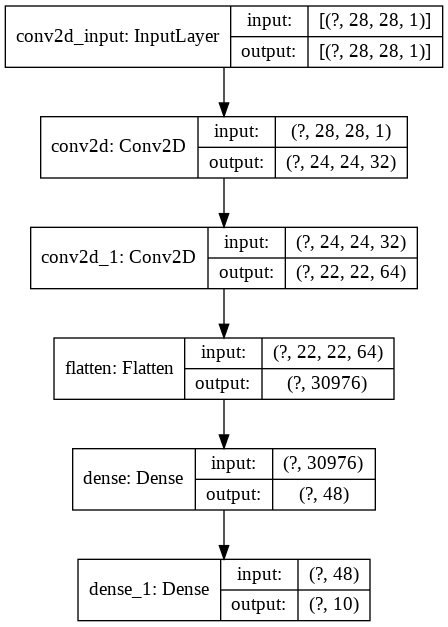

In [21]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
val=metrics.accuracy_score(y_test,y_pred)
print("accuracy is=",str(val*100)+" %")

accuracy is= 96.50999999999999 %


In [37]:
#check the layers
for layer in model.layers:
  #check layers other than convoluition layer
  if 'conv' not in layer.name:
    continue
    #get weights of layers
  filters,bias=layer.get_weights()
  print(layer.name,filters.shape)

conv2d (5, 5, 1, 32)
conv2d_1 (3, 3, 32, 64)


In [ ]:
#get weights of second hidden layer
filters,bias=model.layers[1].get_weights()

In [43]:
#range the values of filter between 0&1 to visualize them
f_min,f_max=filters.min(),filters.max()
filters=(filters-f_min)/(f_max-f_min)

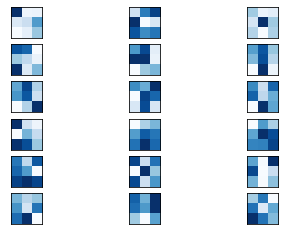

In [46]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='Blues')
		ix += 1
# show the figure
plt.show()